In [138]:
import numpy as np 
import matplotlib.pylab as plt
from scipy import stats

In [139]:
G = 4.302*10**(-6)

#my models to fit the observations:
#my models to fit the observations:
#Burkert halo
def Burkert_halo(r, r0, rho0):
	G = 4.302*10**(-6) # units (kpc/Msun)*(km2/s2)
	M0 =(np.pi*rho0*(r0**3)) #units Msun
	Mbh = (4*M0)*( (np.log(1+(r/r0))) - (np.arctan(r/r0)) + (0.5*np.log(1+((r/r0)**2))) )
	Vbh = ((G*Mbh)/r)**0.5
	return Vbh
	

In [140]:
from scipy.special import kv
from scipy.special import iv
def disk_velocity(Md, rd, r):
	G = 4.302*10**(-6) # units (kpc/Msun)*(km2/s2)
	x = r/(3.2*rd)
	# ~ x = r/(6.4*Rd)
	#bassel func~~~~~
	# ~ #first 
	v0 = 0  #order of bessel func
	K0 = kv(v0, 1.6*x) #BESSEL Function
	I0 = iv(v0, 1.6*x) #BESSEL Function
	#~~~second 
	v1 = 1  #order of bessel func
	K1 = kv(v1, 1.6*x) #BESSEL Function
	I1 = iv(v1, 1.6*x) #BESSEL Function

	c0 = (I0*K0)-(I1*K1)
	Vd = ((0.5)*(G*Md/rd)*((3.2*x)**2)*c0)**0.5
	return Vd

In [141]:
from scipy.special import kv
from scipy.special import iv

def HI_velocity(MHI, RHI, r):
	G = 4.302*10**(-6) # units (kpc/Msun)*(km2/s2)
	x = r/RHI
	#bassel func~~~~~
	#first 
	v0 = 0  #order of bessel func
	K0 = kv(v0, 0.53*x) #BESSEL Function
	I0 = iv(v0, 0.53*x) #BESSEL Function
	#~~~second 
	v1 = 1  #order of bessel func
	K1 = kv(v1, 0.53*x) #BESSEL Function
	I1 = iv(v1, 0.53*x) #BESSEL Function

	c0 = (I0*K0)-(I1*K1)
	VHI = ((0.5)*(G*MHI/(RHI))*((x**2))*c0)**0.5
	return VHI

In [142]:
#Recall and plot funnctions
R=np.linspace(0.01,20,100) #kpc
G=4.302*10**(-6) #kpc^3/Msun.s^2



#For Dark Matter (Burkert Halo)
core_radius=5 #kpc
core_density=1*10**8 #Msun/Kpc^3

#For Disk Velocity
stellar_mass=3*10**10 #M_D in Msun
Stellar_radius=2 #R_D in kpc

#For HI Gas
HI_gas_mass=10**9 #MHI in Msun
HI_radius =3*Stellar_radius # in kpc


In [143]:
Vdm=Burkert_halo(R, core_radius, core_density)
Vgas=HI_velocity(HI_gas_mass, HI_radius, R)
Vstar=disk_velocity(stellar_mass, Stellar_radius, R)
Vtot=(Vdm**2+Vgas**2+Vstar**2)**0.5

In [144]:
data=[[R],[Vtot],[Vstar],[Vgas],[Vdm]]

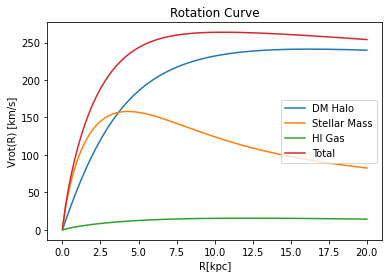

In [145]:
plt.plot(R,Vdm,label='DM Halo')
plt.plot(R,Vstar, label='Stellar Mass')
plt.plot(R,Vgas,label='HI Gas')
plt.plot(R,Vtot, label='Total')
plt.title('Rotation Curve')
plt.xlabel('R[kpc]')
plt.ylabel('Vrot(R) [km/s]')

plt.legend()
plt.show()